# Pruebas caso base

## 0. Importación de librerías

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from CMPendulum import pendulum as pend, animation as ani, basins as bs

In [2]:
%matplotlib auto
%matplotlib auto

Using matplotlib backend: <object object at 0x00000283550FA440>
Using matplotlib backend: TkAgg


## 1. Analizando energías

### A. Función para graficar energías

In [42]:
# Get potential and kinetic energy
def get_energy(selfp):
    # Pendulum constants
    m = selfp.m
    d = selfp.d
    l = selfp.l
    # Positions
    X = selfp.X
    Y= selfp.Y
    Z = - np.sqrt(l**2 - X**2 - Y**2) + (l+d)
    # Velocities
    Vx = selfp.Vx
    Vy = selfp.Vy
    Vz = (X*Vx+Y*Vy)/(l+d-Z)
    # Mgnetic dipoles constants and vector
    m1 = selfp.mu_P_magn
    Um1_x = X/l                 # X component  
    Um1_y = Y/l                 # Y component 
    Um1_z = (Z-l-d)/l           # Z component
    NINTERVALS = len(selfp.B)   # Number of steps
    # Magnetic Fields
    Bx = np.array([selfp.B[i][0] for i in range(NINTERVALS)])
    By = np.array([selfp.B[i][1] for i in range(NINTERVALS)])
    Bz = np.array([selfp.B[i][2] for i in range(NINTERVALS)])
    # Potentials
    Ug = m*9.8*(Z-d)
    Um = -m1 * (Um1_x*Bx + Um1_y*By + Um1_z*Bz)
    Um = Um - min(Um)           # Fit the surface of zero-potential
    U = Ug+Um
    # Kinetic Energy
    K = 0.5*m*(Vx**2+Vy**2+Vz**2)
    return U, Ug, Um, K

# Plot energies
def plot_energy(selfp):
    U, Ug, Um, K = get_energy(selfp)
    NINTERVALS = len(selfp.B)   # Number of steps
    # Plot Energies
    plt.figure(figsize=(15,4))
    t = np.linspace(0, NINTERVALS*selfp.h, NINTERVALS)
    plt.title('Energies of the system', fontsize = 15)
    
    plt.subplot(131)
    plt.plot(t,U,'-',color='orange',label = 'Potential Energy',lw=1.2)
    plt.ylabel('Potential Energy [J]', fontsize = 12); plt.xlabel('Time [s]', fontsize = 12)
    plt.legend(fontsize=10); plt.xticks(size = 10);  plt.yticks(size = 10)
    
    plt.subplot(132)
    plt.plot(t,K,'-b',label = 'Kinetic Energy',lw=1.2)
    plt.ylabel('Kinetic Energy [J]', fontsize = 12); plt.xlabel('Time [s]', fontsize = 12)
    plt.legend(fontsize=10); plt.xticks(size = 10);  plt.yticks(size = 10)
    
    plt.subplot(133)
    plt.plot(t,U+K,'-r',label = 'Mechanical Energy',lw=1.0)
    plt.ylabel('Mechanical Energy [J]', fontsize = 12); plt.xlabel('Time [s]', fontsize = 12)
    plt.ylim(0,max(U)*11/10)
    plt.legend(fontsize=10); plt.xticks(size = 10);  plt.yticks(size = 10)

### B. Parámetros del código

In [27]:
# Physical parameters
l = 0.5
R = 0
d = 0.01
m = 1
mu_P_magn = 1

# Code parameters
h = 0.01
T0 = 2*np.pi*np.sqrt(l/9.8)  # Pendulum period
T = 1.4                       # Total time of simulation
N = int(T/h)


# Magnets
Mx = [0]; My = [0]
mu = [0]; u = [np.array([0,0,-1])]

# Initial Conditions
CI = [0.1, 0, 0, 0]

In [28]:
p = pend.pendulum()
p.set_pendulum(R=R,l=l,d=d,m=m,mu_P_magn=mu_P_magn)
p.set_code_parameters(h, N)
p.set_magnets(Mx, My, [0], mu, u)
p.set_initial_conditions(CI, 'cartesians')
inicio = time.time()
p.find_path(show=True, Return='none')
fin = time.time(); print('Tiempo de ejecución: %.2f'%(fin-inicio))

====================== Summary report ============================
Physical parameters: 
   l =  0.5
   d =  0.01
   R =  0
   m =  1
   mu_P_magn =  1
   mu_P_dir  =  [ 0  0 -1]
   model =  RK4
   law   =  F1
Code parameters:
   h =  0.01
   N =  141
Initial values
   x  =  0.1
   y  =  0
   vx =  0
   vy =  0
   NMAGNETS =  1
   mu_magn  =  [0]
   mu_dir   =  [array([ 0,  0, -1])]
███╗   ███╗ █████╗  ██████╗ ███╗   ██╗███████╗████████╗██╗ ██████╗
████╗ ████║██╔══██╗██╔════╝ ████╗  ██║██╔════╝╚══██╔══╝██║██╔════╝
██╔████╔██║███████║██║  ███╗██╔██╗ ██║█████╗     ██║   ██║██║     
██║╚██╔╝██║██╔══██║██║   ██║██║╚██╗██║██╔══╝     ██║   ██║██║     
██║ ╚═╝ ██║██║  ██║╚██████╔╝██║ ╚████║███████╗   ██║   ██║╚██████╗
╚═╝     ╚═╝╚═╝  ╚═╝ ╚═════╝ ╚═╝  ╚═══╝╚══════╝   ╚═╝   ╚═╝ ╚═════╝

██████╗ ███████╗███╗   ██╗██████╗ ██╗   ██╗██╗     ██╗   ██╗███╗   ███╗
██╔══██╗██╔════╝████╗  ██║██╔══██╗██║   ██║██║     ██║   ██║████╗ ████║
██████╔╝█████╗  ██╔██╗ ██║██║  ██║██║   ██║██║     ██║   ██║██╔████

### C. Resultados

In [29]:
# Get self
selfp = p.get_self()

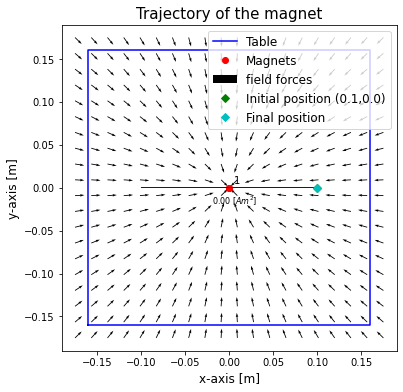

In [7]:
#Plot trajectories
%matplotlib inline
p.plot_alltable()              
p.plot_vector_space(res=20)
p.plot_path()

In [39]:
# Animate path
%matplotlib auto
ani.animate_path(selfp)
plt.show()

In [8]:
# Plot potential
%matplotlib auto
p.plot_potential()

Using matplotlib backend: TkAgg


In [43]:
#Plot Energies
%matplotlib auto
plot_energy(selfp)
plt.show()

Using matplotlib backend: TkAgg


In [44]:
# Path 3D
plt.figure(figsize=(5,4))
ax = plt.axes(projection='3d')
ax.plot3D(X,Y,Z,'gray')
plt.show()

### D. Explorando resultados

In [45]:
U, Ug, Um, K = get_energy(selfp)
NINTERVALS = len(selfp.B)   # Number of steps
# Plot Energies
plt.figure(figsize=(6,5))
t = np.linspace(0, NINTERVALS*selfp.h, NINTERVALS)
plt.title('Energies of the system', fontsize = 15)
plt.plot(t,U,'-',color='orange',label = 'Potential Energy',lw=1.2)
plt.plot(t,K,'-b',label = 'Kinetic Energy',lw=1.2)
plt.plot(t,U+K,'-r',label = 'Mechanical Energy',lw=1.0)
plt.ylabel('Potential Energy [J]', fontsize = 12); plt.xlabel('Time [s]', fontsize = 12)
plt.legend(fontsize=10); plt.xticks(size = 10);  plt.yticks(size = 10)
plt.show()

### Bias entre energía potencial y cinética
Esta diferencia se mantinene aún al variar el parámetro h desde 0.01 hasta 0.0001, posiblemente se debe a la presición del computador.

In [31]:
max(U)

0.09900010414497122

In [32]:
max(K)

0.09701336569722871

In [33]:
max(U) - max(K)

0.0019867384477425115